## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [780]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json

pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [781]:
df[['TV','radio','newspaper']]

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
6,8.7,48.9,75.0
7,57.5,32.8,23.5
8,120.2,19.6,11.6
9,8.6,2.1,1.0
10,199.8,2.6,21.2



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

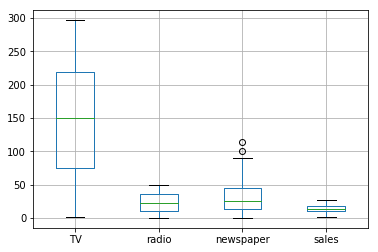

In [782]:
df.boxplot()

The box plot shows that the variables have generally varying coefficient ranges, with a much larger range for advertising dollars spent on TV and much smaller range for sales.

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

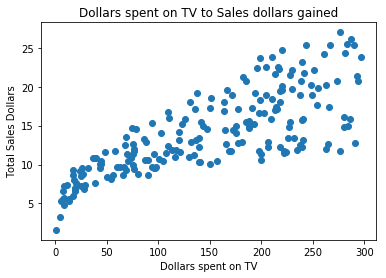

In [783]:
# scatter plot of advertising dollars spent on TV to total Sales dollars gained
plt.scatter(df['TV'],df['sales'])
plt.ylabel('Total Sales Dollars')
plt.xlabel('Dollars spent on TV')
plt.title('Dollars spent on TV to Sales dollars gained')
plt.show()

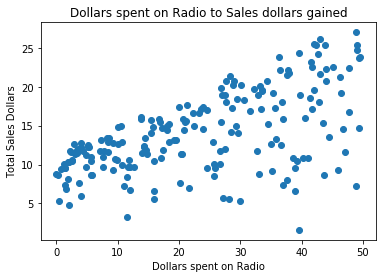

In [784]:
# scatter plot of advertising dollars spent on Radio to total Sales dollars gained
plt.scatter(df['radio'],df['sales'])
plt.ylabel('Total Sales Dollars')
plt.xlabel('Dollars spent on Radio')
plt.title('Dollars spent on Radio to Sales dollars gained')
plt.show()

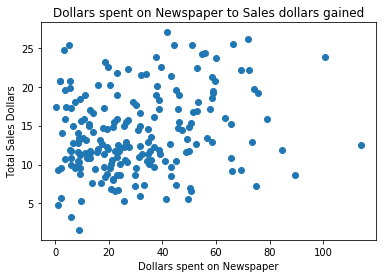

In [785]:
# scatter plot of advertising dollars spent on Newspaper to total Sales dollars gained
plt.scatter(df['newspaper'],df['sales'])
plt.ylabel('Total Sales Dollars')
plt.xlabel('Dollars spent on Newspaper')
plt.title('Dollars spent on Newspaper to Sales dollars gained')
plt.show()

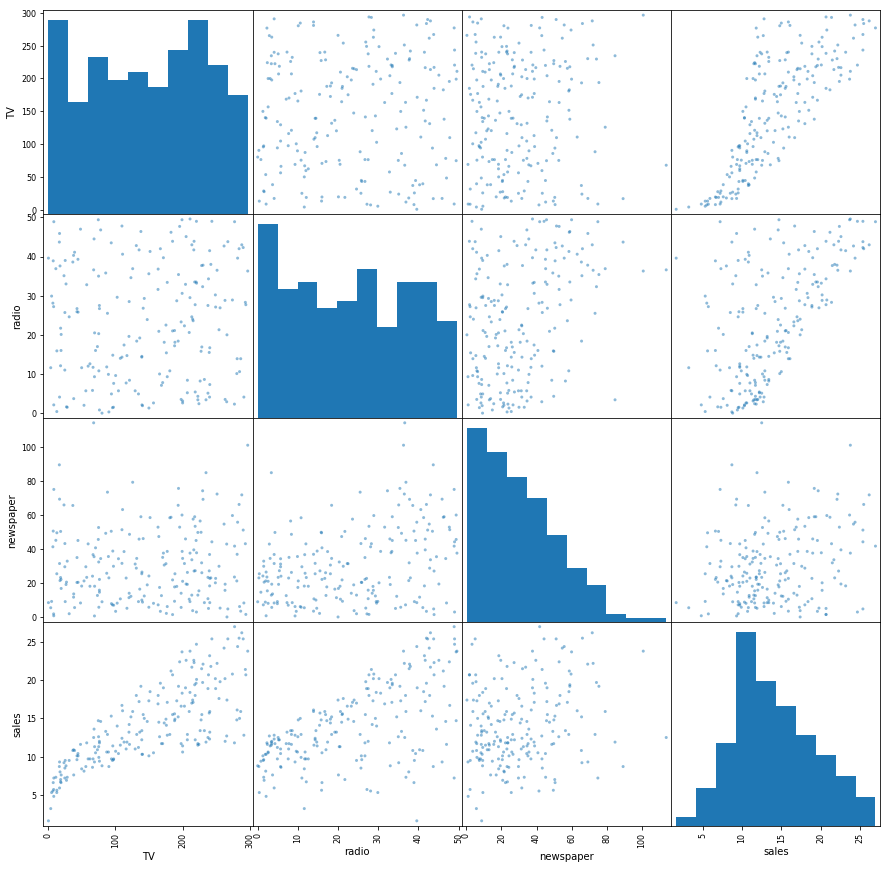

In [786]:
# Combined scatter plot matrix
from pandas.plotting import scatter_matrix 
scatter_matrix(df,alpha=0.5,figsize=(15,15))
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

Overall, the advertising dollars spent on TV appears to be positively correlated with sales dollars, where the higher amount of dollars spent on TV, the higher the sales dollars. This is similar for the advertising dollars spent on radio, where the variable seems to be positively correlated with sales dollars. However, there appears to be more deviation from the general positive trend for these two variables than for TV and sales, hence potentially lower positive correlation between radio advertising dollars and sales. On the other hand, there does not seem to be a correlation between newspaper advertising dollars and sales dollars, as observed from the scatter plot above.
In addition, the variables TV, radio and newspaper do not appear to be correlated with one another from the scatter plots shown.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [787]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [788]:
y=df['sales']

b) Set X to be just the features described above in df

In [789]:
X = df.drop(['sales'],1)

In [790]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [791]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

c) Randomly split data into training and testing - 80% training, 20% testing.

In [792]:
from sklearn.cross_validation import train_test_split
# Randomly split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=1)

d) Train model on training data, and make predictions on testing data

In [793]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R^2 Score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 0.0468431   0.17854434  0.00258619]
Residual sum of squares: 1.99
R^2 Score: 0.89


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

R^2 measures the goodness of fit of a model. Given a R^2 of 0.89 on testing data, this shows that the model is rather good at accounting for the variation in outcomes, specifically accounting for 89% of the total variation in outcomes.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

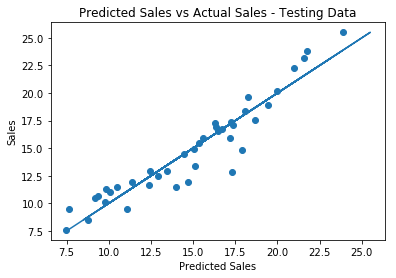

In [794]:
plt.figure(figsize=(6,4))
plt.ylabel('Sales')
plt.xlabel('Predicted Sales')
plt.title('Predicted Sales vs Actual Sales - Testing Data')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)
plt.show()

The model overall seems to be rather linear, hence a rather good model. Nonetheless, there appears to be several outliers, hence not a perfect model. 

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

To measure the importance of the features in the model, I can examine and compare the coefficients of the features, in terms of how much each variable changes the response variable to compare the relative effects of the features. However, I should check that the features are standardised, with mean zero and unit variance, to compare the relative effects of the features given that they have different scales, and that there is no interaction or dependence between the features.

In [795]:
from sklearn import preprocessing
# Standardising features
scaler = preprocessing.StandardScaler()
X2 = X.as_matrix().astype(np.float)
X2 = scaler.fit_transform(X)

In [796]:
# Randomly split data into training/testing sets 
X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y, test_size=0.2, random_state=1)
# Create linear regression object
regr2 = LinearRegression()

# Train the model using the training sets
regr2.fit(X2_train, y2_train)

# Make predictions using the testing set
y2_pred = regr2.predict(X2_test)

# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(X2_test) - y2_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R^2 Score: %.2f' % regr2.score(X2_test, y2_test))

Coefficients: 
 [ 4.01161205  2.64417846  0.05618258]
Residual sum of squares: 1.99
R^2 Score: 0.89


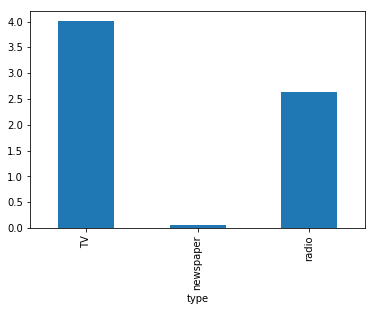

In [797]:
# Plot coefficients after standardising features
regr2.coef_
df2_stand = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':regr2.coef_})
df2_stand.groupby('type')['coef'].mean().plot(kind='bar')

Compared to if I did not standardise features:

Coefficients: 
 [ 0.0468431   0.17854434  0.00258619]
Residual sum of squares: 1.99
R^2 Score: 0.89


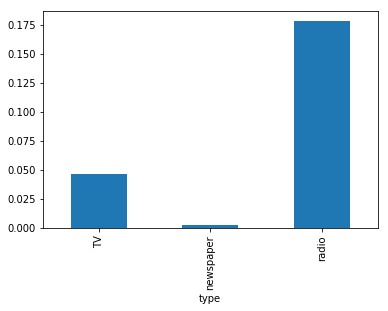

In [798]:
# For non-standardised features
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R^2 Score: %.2f' % regr.score(X_test, y_test))

# Plot coefficients without standardising features
regr.coef_
df2_unstand = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':regr.coef_})
df2_unstand.groupby('type')['coef'].mean().plot(kind='bar')

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

From part g), the first bar chart of coefficients with standardised features shows that the advertising dollars spent on TV appears to be the most important feature influencing sales, with the highest coefficient compared to that for advertising dollars spent on radio and newspaper. 
Comparing the bar charts of the coefficients with standardised and non-standardised features respectively, the two bar charts show the importance of standardising the features, where different results are generated in the two charts. Specifically, without standardisation, radio advertising dollars appear to be the most important feature influencing sales, with the highest coefficient. However, with standardisation of the features, TV advertising dollars is instead the most important feature influencing sales dollars. 
Therefore, this shows that to measure the importance of the features involved, I should have standardised the features in order to accurately compare the relative importance of the features without distortion.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

Since there appears to be no significant correlation between advertising dollars spent on newspaper and sales dollars gained, I decided to drop the newspaper variable and focus on advertising dollars spent on TV and radio.

In [799]:
# Drop newspaper variable 
X_perf = X.drop(['newspaper'],1)

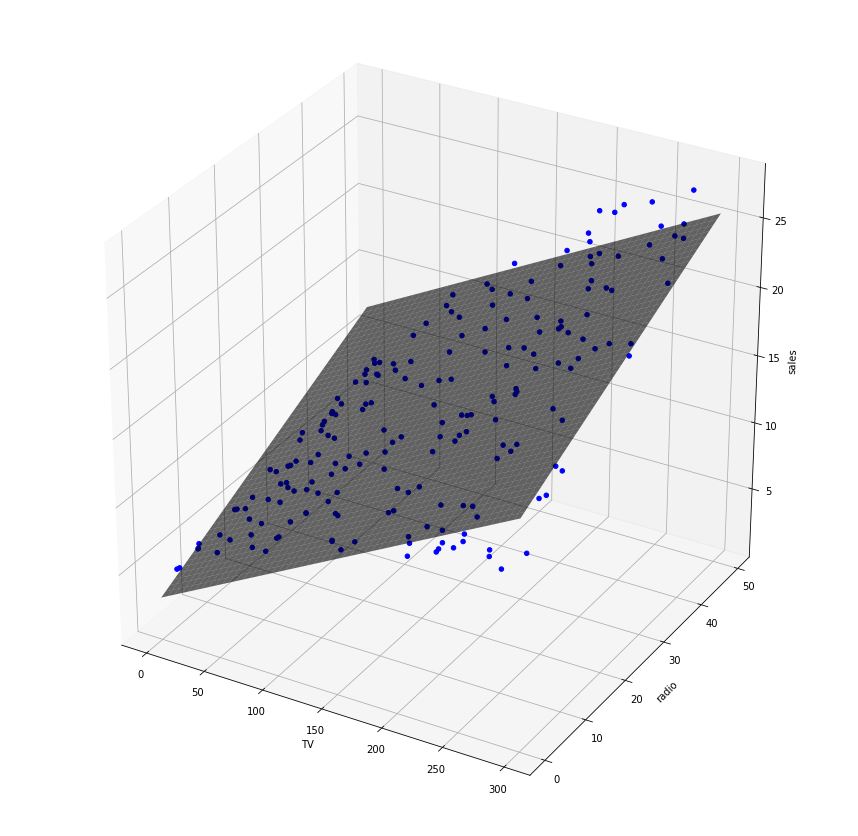

In [800]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Create linear regression object
regr3 = LinearRegression()
regr3.fit(X_perf, y)

# create 3D plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

# create mesh
x_mesh = np.arange(0, 300)                
y_mesh = np.arange(0, 50)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)

exog = pd.core.frame.DataFrame({'TV': x_mesh.flatten(), 'radio': y_mesh.flatten()})
out = regr3.predict(exog)
ax.plot_surface(x_mesh, y_mesh,
                out.reshape(x_mesh.shape),
                alpha = 0.6, color = 'None')

ax.scatter(df['TV'], df['radio'], df['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

From the 3D graph, it appears that not all points lie on the hyperplane, where the model appears to not fit as well for large values of TV and radio advertising dollars. Therefore, I included an interaction term to potentially account for any interaction between these two variables.

In [801]:
# Create interaction term
X_perf['TV*radio']=X_perf['TV']*X_perf['radio']

In [802]:
# Randomly split data into training/testing sets 
X4_train, X4_test, y4_train, y4_test = train_test_split (X_perf, y, test_size=0.2, random_state=1)
# Create linear regression object
regr4 = LinearRegression()

# Train the model using the training sets
regr4.fit(X4_train, y4_train)

# Make predictions using the testing set
y4_pred = regr4.predict(X4_test)

# The coefficients
print('Coefficients: \n', regr4.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr4.predict(X4_test) - y4_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('R^2 Score: %.2f' % regr4.score(X4_test, y4_test))

Coefficients: 
 [ 0.02007095  0.02969222  0.0010734 ]
Residual sum of squares: 0.34
R^2 Score: 0.98


Looking at the R^2 of the new model, it appears that including the interaction term has improved the model's performance, where the model is now able to account for 98% of the total variation in outcomes given a R^2 value of 0.98. This is similarly evident from the scatter plot below of the predicted vs actual sales on the testing data, where the model appears linear with much fewer outliers than before after accounting for interaction effects.

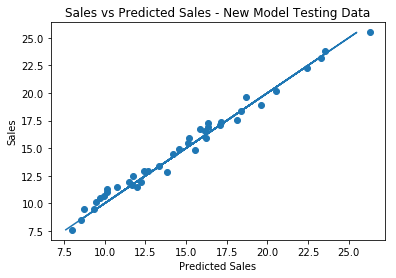

In [803]:
plt.ylabel('Sales')
plt.xlabel('Predicted Sales')
plt.title('Sales vs Predicted Sales - New Model Testing Data')
plt.scatter(regr4.predict(X4_test),y4_test)
plt.plot(y4_test,y4_test)
plt.show()

In [804]:
X_perf.head()

,TV,radio,TV*radio
1,230.1,37.8,8697.78
2,44.5,39.3,1748.85
3,17.2,45.9,789.48
4,151.5,41.3,6256.95
5,180.8,10.8,1952.64


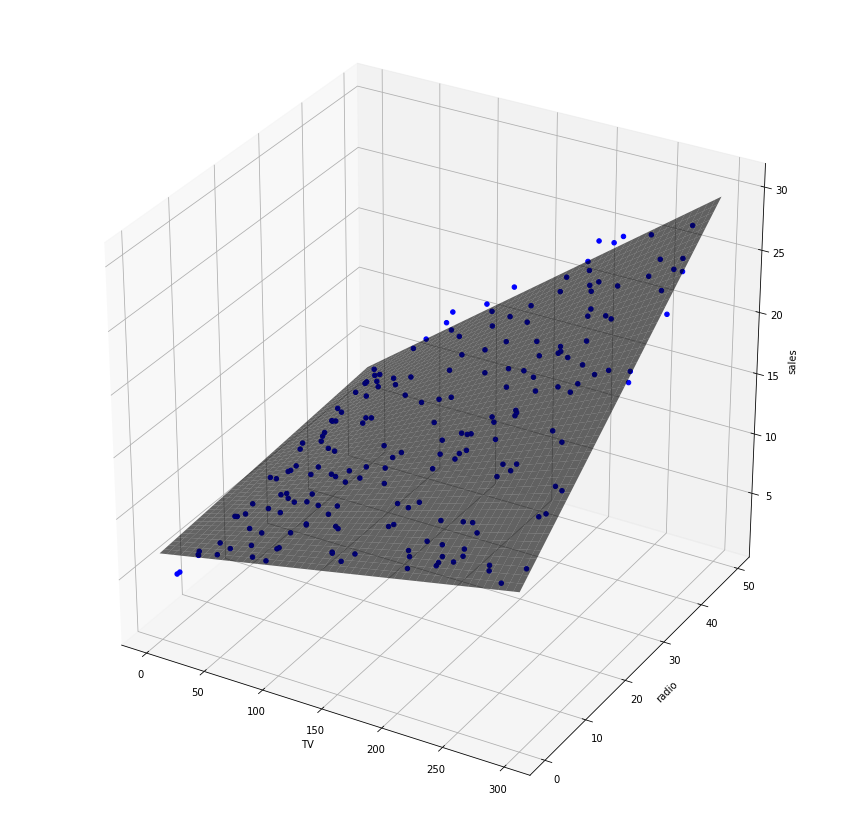

In [805]:
# Create linear regression object
regr5 = LinearRegression()
regr5.fit(X_perf, y)

# create 3D plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

# create mesh
x_mesh = np.arange(0, 300)                
y_mesh = np.arange(0, 50)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
xy = x_mesh*y_mesh

exog = pd.DataFrame({'TV': x_mesh.flatten(), 'radio': y_mesh.flatten(), 'TV*radio': xy.flatten()})
exog = exog[['TV', 'radio', 'TV*radio']]
out = regr5.predict(exog)
ax.plot_surface(x_mesh, y_mesh,
                out.reshape(x_mesh.shape),
                alpha = 0.6, color = 'None')

ax.scatter(df['TV'], df['radio'], df['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

Overall, including the interaction term appears to have improved the performance of the model.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


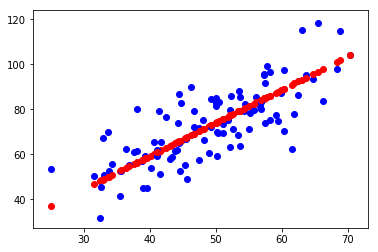

In [806]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations=100,learning_rate = 0.0001):
    points = genfromtxt("/Users/Wanlun/Documents/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1],color='b')
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100,0.0001)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


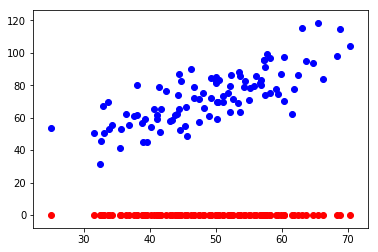

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


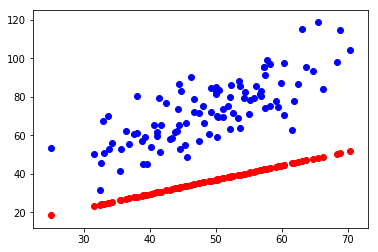

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


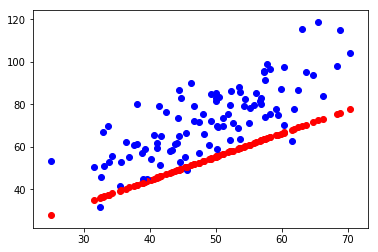

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


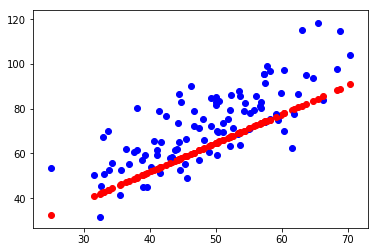

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


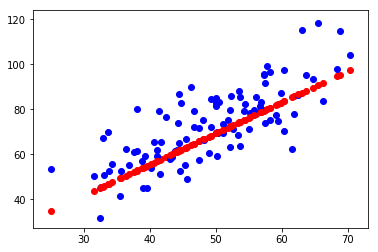

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


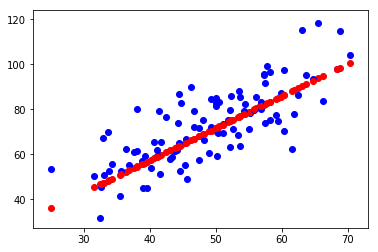

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


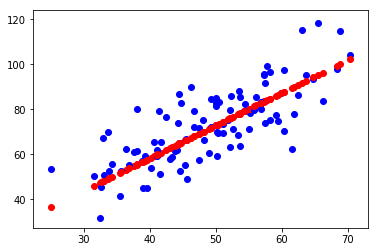

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


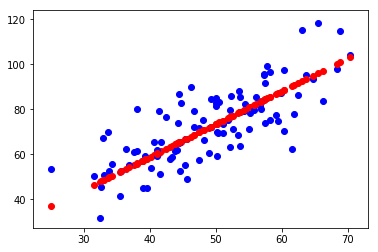

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


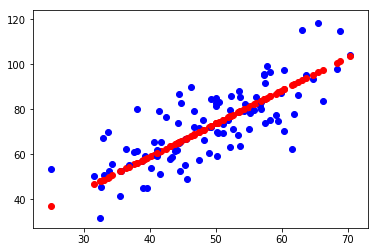

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


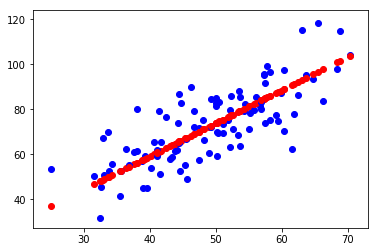

In [807]:
# For learning rate = 0.0001, fast convergence with decreasing error with each iteration
for num in range(0,10):
    run(num)
    plt.show()


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


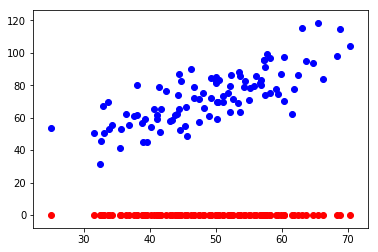

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


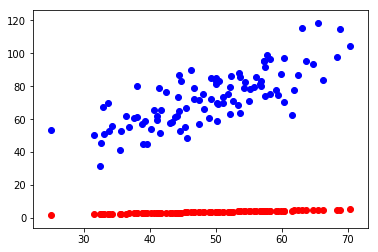

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


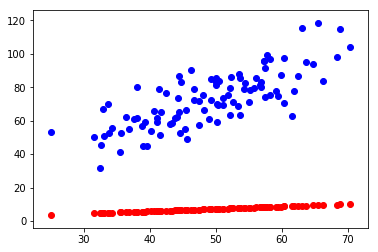

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


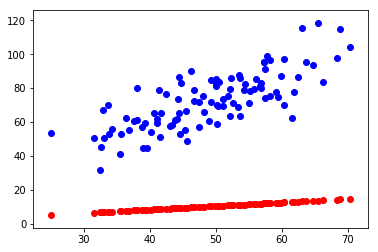

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


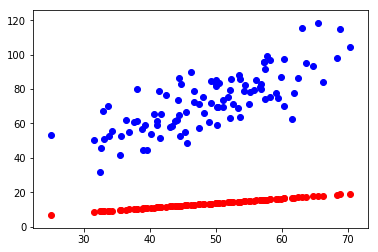

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


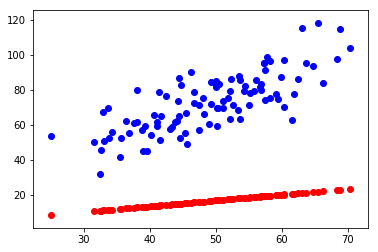

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


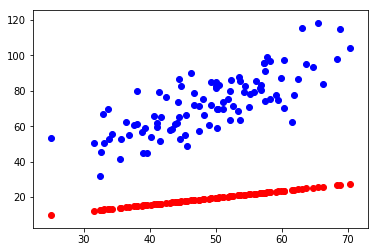

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


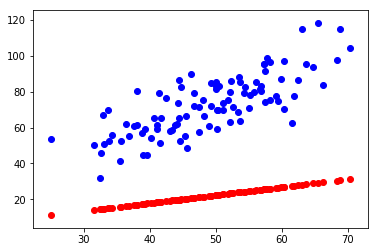

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


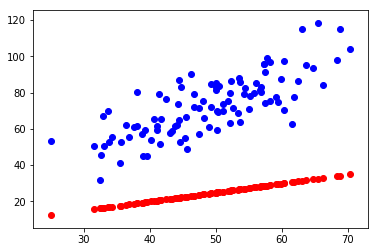

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


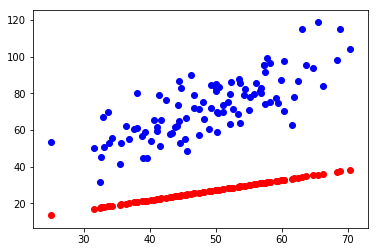

In [808]:
# For much smaller learning rate = 0.00001, much slower convergence, rather inefficient
for num in range(0,10):
    run(num,0.00001)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


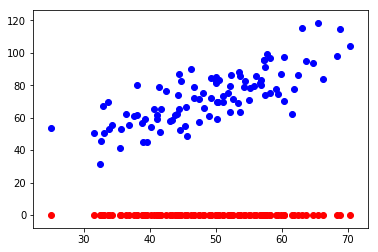

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.14547010110737296, m = 7.370702973591052, error = 86648.7950040084


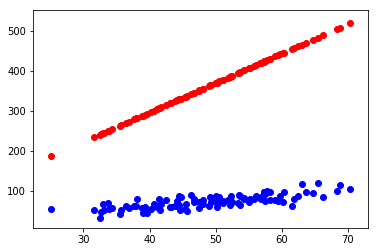

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.4310655239730718, m = -21.99310808948739, error = 1373530.9288716826


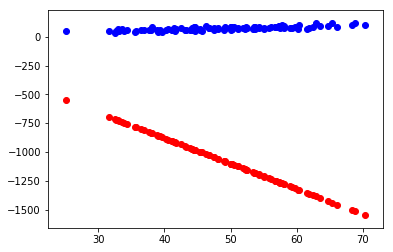

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 1.8687588994744613, m = 94.98776074664512, error = 21797683.773910433


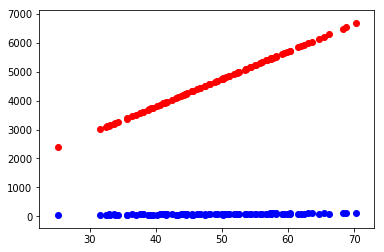

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -7.290394967823431, m = -371.0461698674138, error = 345950151.4758198


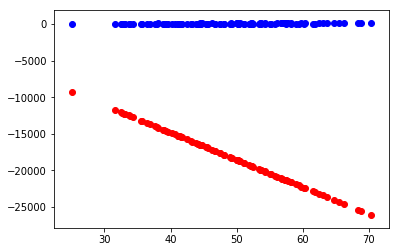

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 29.201266087964783, m = 1485.5616013916942, error = 5490585677.503522


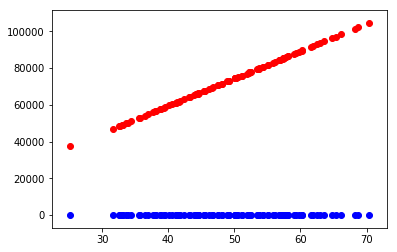

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -116.1729306293348, m = -5910.879572855865, error = 87141281978.78775


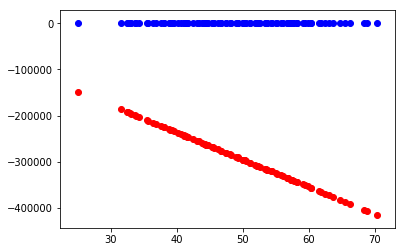

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 462.9786062650985, m = 23555.409616750556, error = 1383022432889.3494


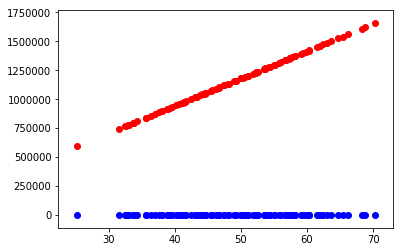

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1844.2694554138704, m = -93833.77530608332, error = 21949998997164.68


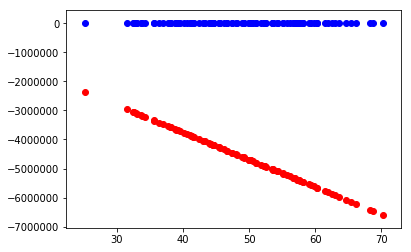

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 7347.456577722989, m = 373826.76516900567, error = 348369227101706.6


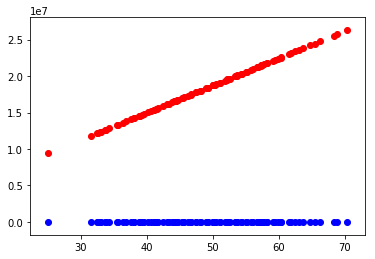

In [809]:
# For higher learning rate = 0.001, divergence with increasing error with each iteration
for num in range(0,10):
    run(num,0.001)
    plt.show()

The learning rate is the size of the step taken of the gradient descent optimisation technique to minimise a convex cost function through iteration to reach a local minumum. With each step in the direction of the steepest descent specified by the negative gradient, the negative gradient is recalculated and direction respecified. This gradient is calculated with the partial derivatives of the parameters in the cost function, in this case b and m, which is then used for each iteration of the gradient descent.
As seen from the equation below:

$\beta_{n} = \beta_{n-1} - \kappa \nabla_{\beta} \mathcal{L}(\beta_{n-1})$

the learning rate $\kappa$ determines the size of updating the parameters to eventually reach the minimum. In this case, a higher learning rate indicates a larger weight placed on the gradient of the cost function, hence larger difference between $\beta_{n}$ and $\beta_{n-1}$ and fewer steps $n$, potentially reaching the minimum faster.

Given a certain learning rate, there can be either convergence or divergence. The initial learning rate of 0.0001 shows a fast convergence to the minimum to produce a rather good fit. 
With a relatively lower learning rate, the steps taken in the gradient descent are much smaller, with constant recalculation and higher precision leading to convergence. However, given that smaller steps are taken each time, this may require too many iterations to reach the minimum, resulting in a rather slow convergence, as seen in the gradient descent for learning rate = 0.00001.
On the other hand, with a high learning rate, the process can be much faster, but there is a risk of taking too large a step such that it overshoots the minimum and oscillates back and forth, resulting in increasing errors and a divergent solution, as in the case of learning rate = 0.001.
Therefore, modifying the learning rate changes the size of the step taken of the gradient descent, influencing the weightage given to the cost function gradient and hence, size of the update with each iteration.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

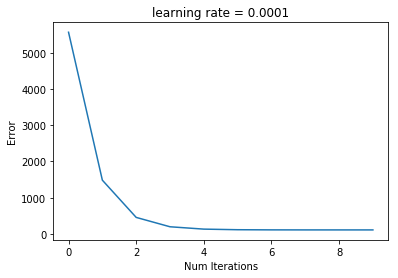

In [810]:
points = genfromtxt("/Users/Wanlun/Documents/APMAE4990-/data/data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
learning_rate = 0.0001
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
num_iterations_array = np.arange(0,10)

for x in num_iterations_array:
    num_iterations = x
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Num Iterations')
plt.ylabel('Error')
plt.title('learning rate = 0.0001')

plt.plot(num_iterations_array,errors)

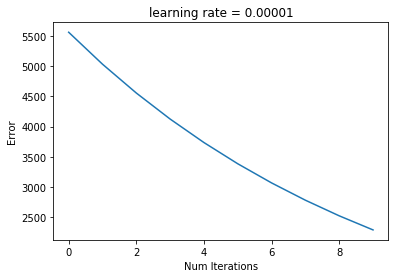

In [811]:
learning_rate = 0.00001
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
num_iterations_array = np.arange(0,10)

for x in num_iterations_array:
    num_iterations = x
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Num Iterations')
plt.ylabel('Error')
plt.title('learning rate = 0.00001')

plt.plot(num_iterations_array,errors)

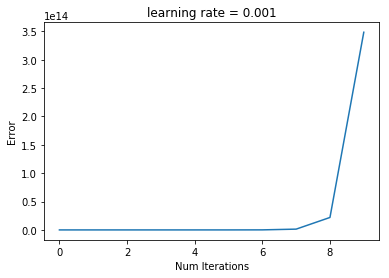

In [812]:
learning_rate = 0.001
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
num_iterations_array = np.arange(0,10)

for x in num_iterations_array:
    num_iterations = x
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Num Iterations')
plt.ylabel('Error')
plt.title('learning rate = 0.001')

plt.plot(num_iterations_array,errors)

The plots above demonstrate the change in errors with each iteration for the 3 learning rates used in part 1, with learning rate = 0.0001, 0.00001 and 0.001 respectively. For a gradient descent that works, the errors should be decreasing with each iteration for convergence and eventual fit. In the first case of learning rate = 0.0001, this is a rather efficient learning rate as it results in fast convergence, with the plot showing the error decreasing exponentially with each iteration. 
However, by setting a much smaller learning rate of 0.00001, this instead results in much smaller steps taken to work towards finding the line with the minimum error. In this case, while the error decreases with each iteration, this process is much slower as the learning rate is too low, resulting in a rather slow convergence. This is demonstrated by the second plot above of learning rate = 0.00001, with slow and gradual decrease in error with each iteration.
On the other hand, by increasing the learning rate to 0.001, this learning rate is too high, resulting in overshooting the minimum and divergence. This is shown by the last plot of learning rate = 0.001, with exponential increase in error with each iteration, noting the large error on the 1e14 scale in the y axis. This is also demonstrated in part 1, with the back and forth oscillation of the gradient descent for learning rate = 0.001. Hence, setting too high a learning rate may prove rather bad, resulting in divergence.